In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
folder1 = "Data"
ligas = ["Premier", "Bundesliga", "Ligue-1"]
años = ["19-20", "20-21", "21-22", "22-23", "23-24"]
torneos = []

for liga in ligas:
    for año in años:
        match_file = f"stats_{año}.csv"
        try:
            path_matches = os.path.join(folder1, liga, match_file)
            matches = pd.read_csv(path_matches)
        except FileNotFoundError:
            continue
        torneos.append(matches)

In [51]:
for torneo in torneos:
    pd.set_option('display.max_rows', None)
    print(torneo.isna().sum())
    print(torneo.isna().sum().sum())
    print("-----------------")

number_of_match                 0
team_home                       4
team_away                       4
home_score                      4
away_score                      4
posession_home                  4
posession_away                  4
total_shots_home                4
total_shots_away                4
shots_on_target_home            4
shots_on_target_away            4
shots_off_target_home           4
shots_off_target_away           4
blocked_shots_home              4
blocked_shots_away              4
corner_kicks_home               4
corner_kicks_away               4
offsides_home                  19
offsides_away                  19
fouls_home                      4
fouls_away                      4
yellow_cards_home              20
yellow_cards_away              20
red_cards_home                  4
red_cards_away                  4
free_kicks_home                 4
free_kicks_away                 4
throw_ins_home                384
throw_ins_away                384
goal_kicks_hom

Borrare los partidos de cada torneo en que no se hayan registrado los equipos que juegan

In [52]:

for torneo in torneos:
    torneo.dropna(subset=['team_home', 'team_away'], inplace=True)
    print(torneo.isna().sum())
    print(torneo.isna().sum().sum())
    print("-----------------")

number_of_match                 0
team_home                       0
team_away                       0
home_score                      0
away_score                      0
posession_home                  0
posession_away                  0
total_shots_home                0
total_shots_away                0
shots_on_target_home            0
shots_on_target_away            0
shots_off_target_home           0
shots_off_target_away           0
blocked_shots_home              0
blocked_shots_away              0
corner_kicks_home               0
corner_kicks_away               0
offsides_home                  15
offsides_away                  15
fouls_home                      0
fouls_away                      0
yellow_cards_home              16
yellow_cards_away              16
red_cards_home                  0
red_cards_away                  0
free_kicks_home                 0
free_kicks_away                 0
throw_ins_home                380
throw_ins_away                380
goal_kicks_hom

Se borrarán todas las columnas que tengan datos faltantes en alguno de los torneos

In [53]:
columns_with_null = []

for torneo in torneos:
    null_columns = torneo.columns[torneo.isna().any()].tolist()
    columns_with_null.append(null_columns)

unique_columns = list(set(itertools.chain.from_iterable(columns_with_null)))
unique_columns

print(len(unique_columns))
print(unique_columns)
#Borrar para cada torneo las columnas en unique_columns
for torneo in torneos:
    torneo.drop(columns=unique_columns, inplace=True)

22
['big_chances_home', 'counter_attacks_away', 'offsides_home', 'counter_attacks_home', 'big_chances_away', 'big_chances_missed_away', 'hit_woodwork_away', 'clearences_home', 'counter_attacks_shots_away', 'yellow_cards_away', 'big_chances_missed_home', 'yellow_cards_home', 'counter_attacks_shots_home', 'offsides_away', 'clearences_away', 'possesion_lost_home', 'hit_woodwork_home', 'throw_ins_away', 'goalkeeper_saves_away', 'goalkeeper_saves_home', 'possesion_lost_away', 'throw_ins_home']


In [54]:
for torneo in torneos:
    print(torneo.isna().sum())
    print(torneo.isna().sum().sum())
    print("-----------------")

number_of_match           0
team_home                 0
team_away                 0
home_score                0
away_score                0
posession_home            0
posession_away            0
total_shots_home          0
total_shots_away          0
shots_on_target_home      0
shots_on_target_away      0
shots_off_target_home     0
shots_off_target_away     0
blocked_shots_home        0
blocked_shots_away        0
corner_kicks_home         0
corner_kicks_away         0
fouls_home                0
fouls_away                0
red_cards_home            0
red_cards_away            0
free_kicks_home           0
free_kicks_away           0
goal_kicks_home           0
goal_kicks_away           0
shots_inside_box_home     0
shots_inside_box_away     0
shots_outside_box_home    0
shots_outside_box_away    0
passes_home               0
passes_away               0
accurate_passes_home      0
accurate_passes_away      0
long_balls_home           0
long_balls_away           0
crosses_home        

In [55]:
torneos2 = []

for torneo in torneos:
    torneo.sort_values(by='number_of_match', inplace=True)
    torneo.rename(columns={'home_score': 'score_home', 'away_score': 'score_away'}, inplace=True)

    ##OJOO arreglar tema de equipos
    team_counts = torneo['team_home'].append(torneo['team_away']).value_counts()
    teams_to_remove = team_counts[team_counts < 5].index

    torneo = torneo[~(torneo['team_home'].isin(teams_to_remove) | torneo['team_away'].isin(teams_to_remove))]
    torneos2.append(torneo)


C:\Users\Diego\AppData\Local\Temp/ipykernel_19436/2901177096.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_counts = torneo['team_home'].append(torneo['team_away']).value_counts()
C:\Users\Diego\AppData\Local\Temp/ipykernel_19436/2901177096.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_counts = torneo['team_home'].append(torneo['team_away']).value_counts()
C:\Users\Diego\AppData\Local\Temp/ipykernel_19436/2901177096.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_counts = torneo['team_home'].append(torneo['team_away']).value_counts()
C:\Users\Diego\AppData\Local\Temp/ipykernel_19436/2901177096.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a fu

In [56]:
torneos = torneos2
torneos[0].head()

,number_of_match,team_home,team_away,score_home,score_away,posession_home,posession_away,total_shots_home,total_shots_away,shots_on_target_home,...,dribbles_home,dribbles_away,duels_won_home,duels_won_away,aerials_won_home,aerials_won_away,tackles_home,tackles_away,interceptions_home,interceptions_away
5,0,Liverpool,Norwich City,4.0,1.0,57.0,43.0,15.0,12.0,7.0,...,11.0,10.0,56.0,38.0,15.0,7.0,21.0,12.0,14.0,11.0
34,1,West Ham United,Manchester City,0.0,5.0,42.0,58.0,5.0,14.0,3.0,...,8.0,13.0,57.0,54.0,18.0,17.0,18.0,18.0,9.0,13.0
0,2,Bournemouth,Sheffield United,1.0,1.0,52.0,48.0,13.0,8.0,3.0,...,8.0,6.0,56.0,49.0,14.0,21.0,18.0,14.0,13.0,14.0
21,3,Burnley,Southampton,3.0,0.0,46.0,54.0,10.0,11.0,4.0,...,14.0,6.0,68.0,41.0,23.0,22.0,21.0,7.0,14.0,10.0
11,4,Crystal Palace,Everton,0.0,0.0,35.0,65.0,6.0,10.0,2.0,...,8.0,5.0,71.0,53.0,30.0,18.0,21.0,14.0,10.0,14.0


Ahora se generara la tabla para cada torneo

In [57]:
def remove_suffix(item):
    return item.replace("_home", "").replace("_away", "")

column = [remove_suffix(item) for item in matches.columns]
columnas = []
[columnas.append(x) for x in column if x not in columnas]
columnas.remove("number_of_match")
columnas.remove("team")
columnas[0] = "score_prom"
print(columnas)
print(len(columnas))

['score_prom', 'posession', 'total_shots', 'shots_on_target', 'shots_off_target', 'blocked_shots', 'corner_kicks', 'fouls', 'red_cards', 'free_kicks', 'goal_kicks', 'shots_inside_box', 'shots_outside_box', 'passes', 'accurate_passes', 'long_balls', 'crosses', 'dribbles', 'duels_won', 'aerials_won', 'tackles', 'interceptions']
22


In [58]:
columnas.append("wins")
columnas.append("ties")
columnas.append("losses")
columnas.append("total_goals")
columnas.append("total_goals_conceded")
columnas.append("points")
columnas.append("streak")
columnas.append("wins_in_last_5_matches")
columnas.append("ties_in_last_5_matches")
columnas.append("losses_in_last_5_matches")

In [59]:
tablas = []

for torneo, i in zip(torneos, range(len(torneos))):
    
    equipos = torneo["team_home"].unique()
    equipos2 = torneo["team_away"].unique()
    print(len(equipos), len(equipos2))
    print(equipos)
    stats = columnas

    tabla = {}

    for equipo in equipos:

        tabla[equipo] = dict.fromkeys(stats, 0)
        tabla[equipo]["last_5_matches"] = list()

    tablas.append(tabla)

20 20
['Liverpool' 'West Ham United' 'Bournemouth' 'Burnley' 'Crystal Palace'
 'Watford' 'Tottenham' 'Newcastle United' 'Manchester United' 'Arsenal'
 'Aston Villa' 'Brighton & Hove Albion' 'Everton' 'Norwich City'
 'Southampton' 'Manchester City' 'Sheffield United' 'Chelsea'
 'Wolverhampton' 'Leicester City']
20 20
['Fulham' 'Crystal Palace' 'Liverpool' 'West Ham United'
 'West Bromwich Albion' 'Tottenham' 'Sheffield United'
 'Brighton & Hove Albion' 'Burnley' 'Manchester City' 'Everton'
 'Leeds United' 'Manchester United' 'Arsenal' 'Southampton'
 'Newcastle United' 'Chelsea' 'Leicester City' 'Aston Villa'
 'Wolverhampton']
21 21
['Brentford' 'Manchester United' 'Burnley' 'Chelsea' 'Everton'
 'Leicester City' 'Watford' 'Norwich City' 'Newcastle United' 'Tottenham'
 'Liverpool' 'Aston Villa' 'Crystal Palace' 'Leeds United'
 'Manchester City' 'Brighton & Hove Albion' 'Southampton' 'Wolverhampton'
 'Arsenal' 'West Ham United' 'Tottenham Hotspur']
22 22
['Crystal Palace' 'Fulham' 'AFC Bou

In [60]:
new_stats = ["wins",
"ties",
"losses",
"total_goals",
"total_goals_conceded",
"points",
"streak",
"wins_in_last_5_matches",
"ties_in_last_5_matches",
"losses_in_last_5_matches"]
procesated_matches_columns = list(torneos[0].columns)
procesated_matches_columns.insert(5, "score_prom_away")
procesated_matches_columns.insert(5, "score_prom_home")

for stat in new_stats:
    procesated_matches_columns.append(f"{stat}_home")
    procesated_matches_columns.append(f"{stat}_away")

procesated_matches = pd.DataFrame(columns = procesated_matches_columns)

procesated_matches.head()

,number_of_match,team_home,team_away,score_home,score_away,score_prom_home,score_prom_away,posession_home,posession_away,total_shots_home,...,points_home,points_away,streak_home,streak_away,wins_in_last_5_matches_home,wins_in_last_5_matches_away,ties_in_last_5_matches_home,ties_in_last_5_matches_away,losses_in_last_5_matches_home,losses_in_last_5_matches_away


In [61]:
for torneo, i in zip(torneos, range(len(torneos))):
    tabla = tablas[i]
    for index in torneo.index:
    
        """Escribir info en el nuevo df de partidos con la información hasta el partido la cual esta almacenada en 'tabla'"""
        match = torneo.loc[index]
        team_home = match["team_home"]
        team_away = match["team_away"]

        stats_home = tabla[team_home]
        stats_away = tabla[team_away]

        fila = []
        fila.append(match["number_of_match"])
        fila.append(team_home)
        fila.append(team_away)
        fila.append(match["score_home"])
        fila.append(match["score_away"])

        for stat in stats:
            
            fila.append(tabla[team_home][stat])
            fila.append(tabla[team_away][stat])
        
        procesated_matches.loc[len(procesated_matches)] = fila
        
        """ Actualizar la tabla con lo que realmente ocurrió en ese partido"""

        matches_played_home = tabla[team_home]["wins"] + tabla[team_home]["ties"] + tabla[team_home]["losses"]+1
        matches_played_away = tabla[team_away]["wins"] + tabla[team_away]["ties"] + tabla[team_away]["losses"]+1
        
        ## stats promediadas:
        for stat in stats[:stats.index("wins")]:
            if stat == "score_prom":
                tabla[team_home][stat] = (tabla[team_home][stat]*(matches_played_home-1) + match["score_home"])/matches_played_home
                tabla[team_away][stat] = (tabla[team_away][stat]*(matches_played_away-1) + match["score_away"])/matches_played_away
            else:
                tabla[team_home][stat] = (tabla[team_home][stat]*(matches_played_home-1) + match[f"{stat}_home"])/matches_played_home
                tabla[team_away][stat] = (tabla[team_away][stat]*(matches_played_away-1) + match[f"{stat}_away"])/matches_played_away
            
        ## stats acumuladas
        
        empate = False
        if match["score_home"] > match["score_away"]:

            #victorias / derrotas
            tabla[team_home]["wins"] += 1
            tabla[team_away]["losses"] += 1

            #goles a favor
            tabla[team_home]["total_goals"] += match["score_home"]
            tabla[team_away]["total_goals"] += match["score_away"]

            #goles en contra
            tabla[team_home]["total_goals_conceded"] += match["score_away"]
            tabla[team_away]["total_goals_conceded"] += match["score_home"]

            #puntos
            tabla[team_home]["points"] += 3

            # racha
            tabla[team_home]["streak"] += 1
            tabla[team_away]["streak"] = 0

            # ultimos 5 partidos
            if len(tabla[team_home]["last_5_matches"]) == 5:
                tabla[team_home]["last_5_matches"].pop(0)
            if len(tabla[team_away]["last_5_matches"]) == 5:
                tabla[team_away]["last_5_matches"].pop(0)

            tabla[team_home]["last_5_matches"].append("W")
            tabla[team_away]["last_5_matches"].append("L")


        elif match["score_home"] < match["score_away"]:

            #victorias / derrotas
            tabla[team_away]["wins"] += 1
            tabla[team_home]["losses"] += 1

            #goles a favor
            tabla[team_away]["total_goals"] += match["score_away"]
            tabla[team_home]["total_goals"] += match["score_home"]

            #goles en contra
            tabla[team_away]["total_goals_conceded"] += match["score_home"]
            tabla[team_home]["total_goals_conceded"] += match["score_away"]

            #puntos
            tabla[team_away]["points"] += 3

            # racha
            tabla[team_away]["streak"] += 1
            tabla[team_home]["streak"] = 0

            # ultimos 5 partidos
            if len(tabla[team_home]["last_5_matches"]) == 5:
                tabla[team_home]["last_5_matches"].pop(0)
            if len(tabla[team_away]["last_5_matches"]) == 5:
                tabla[team_away]["last_5_matches"].pop(0)

            tabla[team_away]["last_5_matches"].append("W")
            tabla[team_home]["last_5_matches"].append("L")

        else:
            #empate
            tabla[team_home]["ties"] += 1
            tabla[team_away]["ties"] += 1

            #goles a favor
            tabla[team_home]["total_goals"] += match["score_home"]
            tabla[team_away]["total_goals"] += match["score_away"]

            #goles en contra
            tabla[team_home]["total_goals_conceded"] += match["score_away"]
            tabla[team_away]["total_goals_conceded"] += match["score_home"]

            #puntos
            tabla[team_home]["points"] += 1
            tabla[team_away]["points"] += 1

            # racha
            tabla[team_away]["streak"] += 1
            tabla[team_home]["streak"] += 1

            # ultimos 5 partidos
            if len(tabla[team_home]["last_5_matches"]) == 5:
                tabla[team_home]["last_5_matches"].pop(0)
            if len(tabla[team_away]["last_5_matches"]) == 5:
                tabla[team_away]["last_5_matches"].pop(0)

            tabla[team_away]["last_5_matches"].append("T")
            tabla[team_home]["last_5_matches"].append("T")

        tabla[team_home]["wins_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("W")
        tabla[team_home]["ties_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("T")
        tabla[team_home]["losses_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("L")

        tabla[team_away]["wins_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("W")
        tabla[team_away]["ties_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("T")
        tabla[team_away]["losses_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("L")

In [62]:
matches = procesated_matches

In [63]:
matches.tail()

,number_of_match,team_home,team_away,score_home,score_away,score_prom_home,score_prom_away,posession_home,posession_away,total_shots_home,...,points_home,points_away,streak_home,streak_away,wins_in_last_5_matches_home,wins_in_last_5_matches_away,ties_in_last_5_matches_home,ties_in_last_5_matches_away,losses_in_last_5_matches_home,losses_in_last_5_matches_away
4063,58,Le Havre,Lille,0.0,2.0,2.000000,1.333333,45.000000,62.000000,13.500000,...,5,8,2,0,1,2,2,1,1,2
4064,59,Nice,Stade Brestois,0.0,0.0,1.333333,1.200000,49.666667,50.600000,15.500000,...,12,10,6,2,3,3,2,1,0,1
4065,60,Toulouse,Metz,3.0,0.0,1.000000,1.166667,42.833333,35.666667,8.333333,...,6,8,0,0,0,2,3,2,2,1
4066,62,Nantes,Nantes,3.0,1.0,1.833333,1.833333,40.333333,40.333333,10.500000,...,8,8,4,4,2,2,2,2,1,1
4067,63,Strasbourg,Nantes,1.0,2.0,0.833333,1.857143,42.000000,42.714286,6.500000,...,9,11,0,0,2,3,0,2,3,1


# ML

In [64]:
results = []

for index in matches.index:

    match = matches.loc[index]
    if match["score_home"] > match["score_away"]:
        results.append(1)
    elif match["score_home"] < match["score_away"]:
        results.append(2)
    else:
        results.append(0)

matches["result"] = results

In [65]:
for i in range(0,3):
    cantidad = matches[matches["result"]==i].shape[0]
    print(f"Resultado {i}, hay: {cantidad} partidos, {cantidad*100/len(matches)}%")

Resultado 0, hay: 975 partidos, 23.967551622418878%
Resultado 1, hay: 1768 partidos, 43.461160275319564%
Resultado 2, hay: 1325 partidos, 32.571288102261555%


In [66]:
result = matches["result"]
matches = matches.drop(columns = ["team_home", "team_away", "result", "score_home", "score_away", "number_of_match"])
matches.tail()

,score_prom_home,score_prom_away,posession_home,posession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,shots_off_target_home,shots_off_target_away,...,points_home,points_away,streak_home,streak_away,wins_in_last_5_matches_home,wins_in_last_5_matches_away,ties_in_last_5_matches_home,ties_in_last_5_matches_away,losses_in_last_5_matches_home,losses_in_last_5_matches_away
4063,2.000000,1.333333,45.000000,62.000000,13.500000,14.500000,5.0,5.833333,6.250000,4.333333,...,5,8,2,0,1,2,2,1,1,2
4064,1.333333,1.200000,49.666667,50.600000,15.500000,16.600000,6.0,6.600000,5.666667,5.800000,...,12,10,6,2,3,3,2,1,0,1
4065,1.000000,1.166667,42.833333,35.666667,8.333333,9.333333,3.0,3.333333,3.000000,3.166667,...,6,8,0,0,0,2,3,2,2,1
4066,1.833333,1.833333,40.333333,40.333333,10.500000,10.500000,4.5,4.500000,2.500000,2.500000,...,8,8,4,4,2,2,2,2,1,1
4067,0.833333,1.857143,42.000000,42.714286,6.500000,11.102041,1.5,4.346939,3.500000,3.489796,...,9,11,0,0,2,3,0,2,3,1


In [67]:
X = matches.to_numpy()
scaler = preprocessing.StandardScaler()
X_escalados = scaler.fit_transform(X)
y = result

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_escalados, y, test_size=0.3, random_state = 1, stratify=y)

In [69]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter = 1000)
logistic_reg.fit(X_train, y_train)

predicted_logistic_reg = logistic_reg.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_logistic_reg))

Clasification report
              precision    recall  f1-score   support

           0       0.20      0.01      0.03       292
           1       0.52      0.79      0.63       531
           2       0.47      0.47      0.47       398

    accuracy                           0.50      1221
   macro avg       0.40      0.42      0.37      1221
weighted avg       0.43      0.50      0.43      1221



In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


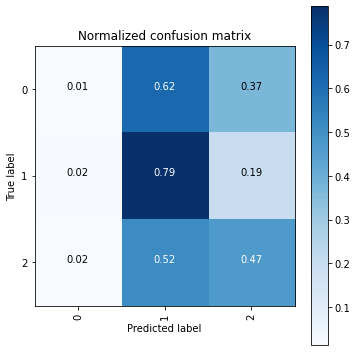

In [71]:
cnf_matrix = confusion_matrix(y_test, predicted_logistic_reg)
np.set_printoptions(precision=2)
classes = np.unique(y)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## SVM

In [72]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel = kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        f"For kernel = {kernel}, the accuracy is: {acc}"
    )


For kernel = linear, the accuracy is: 0.49713349713349714
For kernel = poly, the accuracy is: 0.4651924651924652
For kernel = rbf, the accuracy is: 0.49713349713349714
For kernel = sigmoid, the accuracy is: 0.4144144144144144


In [73]:
from sklearn.svm import SVC

svm = SVC(kernel = "rbf")

svm.fit(X_train, y_train)

predicted_svm = svm.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_svm))

Clasification report
              precision    recall  f1-score   support

           0       0.12      0.00      0.01       292
           1       0.51      0.81      0.62       531
           2       0.48      0.44      0.46       398

    accuracy                           0.50      1221
   macro avg       0.37      0.42      0.36      1221
weighted avg       0.41      0.50      0.42      1221



Normalized confusion matrix


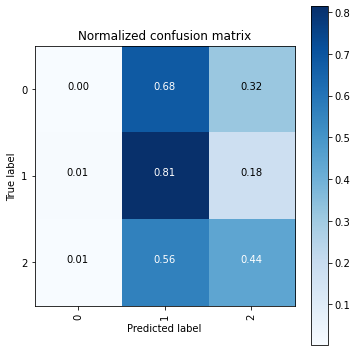

In [74]:
cnf_matrix = confusion_matrix(y_test, predicted_svm)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

range_T = [50, 100, 200, 500, 1000]


for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=50, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 50 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=20, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 20 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=10, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 10 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=5, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For min_samples_split = 50 and t = 50 The accuracy is : 0.4905814905814906
For min_samples_split = 50 and t = 100 The accuracy is : 0.4987714987714988
For min_samples_split = 50 and t = 200 The accuracy is : 0.49221949221949224
For min_samples_split = 50 and t = 500 The accuracy is : 0.49713349713349714
For min_samples_split = 50 and t = 1000 The accuracy is : 0.4963144963144963
For min_samples_split = 20 and t = 50 The accuracy is : 0.4987714987714988
For min_samples_split = 20 and t = 100 The accuracy is : 0.502047502047502
For min_samples_split = 20 and t = 200 The accuracy is : 0.5004095004095004
For min_samples_split = 20 and t = 500 The accuracy is : 0.4995904995904996
For min_samples_split = 20 and t = 1000 The accuracy is : 0.4987714987714988
For min_samples_split = 10 and t = 50 The accuracy is : 0.4873054873054873
For min_samples_split = 10 and t = 100 The accuracy is : 0.48894348894348894
For min_samples_split = 10 and t = 200 The accuracy is : 0.49221949221949224
For min_sa

In [76]:
rf = RandomForestClassifier(min_samples_split=20, n_estimators=100, random_state=0)

rf.fit(X_train, y_train)

predicted_rf = rf.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_rf))

Clasification report
              precision    recall  f1-score   support

           0       0.31      0.04      0.07       292
           1       0.52      0.81      0.63       531
           2       0.48      0.44      0.46       398

    accuracy                           0.50      1221
   macro avg       0.44      0.43      0.39      1221
weighted avg       0.46      0.50      0.44      1221



Normalized confusion matrix


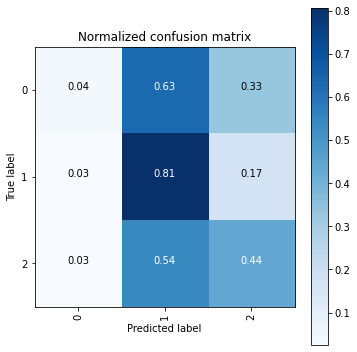

In [77]:
cnf_matrix = confusion_matrix(y_test, predicted_rf)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

range_T = [50, 100, 200, 500, 1000]




for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 6 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 7 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 8 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For max_depth = 2 and t = 50 The accuracy is : 0.4473684210526316
For max_depth = 2 and t = 100 The accuracy is : 0.44129554655870445
For max_depth = 2 and t = 200 The accuracy is : 0.45951417004048584
For max_depth = 2 and t = 500 The accuracy is : 0.46153846153846156
For max_depth = 2 and t = 1000 The accuracy is : 0.4676113360323887
For max_depth = 3 and t = 50 The accuracy is : 0.41700404858299595
For max_depth = 3 and t = 100 The accuracy is : 0.4291497975708502
For max_depth = 3 and t = 200 The accuracy is : 0.45951417004048584
For max_depth = 3 and t = 500 The accuracy is : 0.4959514170040486
For max_depth = 3 and t = 1000 The accuracy is : 0.48582995951417
For max_depth = 4 and t = 50 The accuracy is : 0.46153846153846156
For max_depth = 4 and t = 100 The accuracy is : 0.49190283400809715
For max_depth = 4 and t = 200 The accuracy is : 0.5080971659919028
For max_depth = 4 and t = 500 The accuracy is : 0.5101214574898786
For max_depth = 4 and t = 1000 The accuracy is : 0.4979757

In [ ]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), n_estimators=1000, random_state=0)

ada.fit(X_train, y_train)

predicted_ada = ada.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_ada))

Clasification report
              precision    recall  f1-score   support

           0       0.29      0.09      0.14       111
           1       0.53      0.78      0.63       217
           2       0.56      0.48      0.51       166

    accuracy                           0.52       494
   macro avg       0.46      0.45      0.43       494
weighted avg       0.49      0.52      0.48       494



Normalized confusion matrix


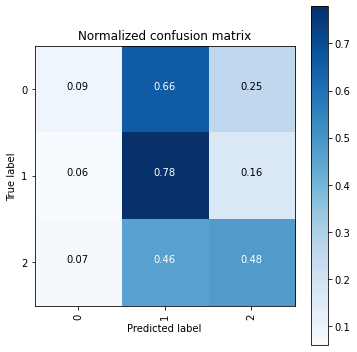

In [ ]:
cnf_matrix = confusion_matrix(y_test, predicted_ada)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

range_T = [50, 100, 200, 500, 1000]




for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =3, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =4, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =5, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =6, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 6 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =7, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 7 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =8, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 8 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For max_depth = 2 and t = 50 The accuracy is : 0.5101214574898786
For max_depth = 2 and t = 100 The accuracy is : 0.5020242914979757
For max_depth = 2 and t = 200 The accuracy is : 0.48785425101214575
For max_depth = 2 and t = 500 The accuracy is : 0.4817813765182186
For max_depth = 2 and t = 1000 The accuracy is : 0.5040485829959515
For max_depth = 3 and t = 50 The accuracy is : 0.5182186234817814
For max_depth = 3 and t = 100 The accuracy is : 0.5080971659919028
For max_depth = 3 and t = 200 The accuracy is : 0.4757085020242915
For max_depth = 3 and t = 500 The accuracy is : 0.4797570850202429
For max_depth = 3 and t = 1000 The accuracy is : 0.4817813765182186
For max_depth = 4 and t = 50 The accuracy is : 0.5080971659919028
For max_depth = 4 and t = 100 The accuracy is : 0.4979757085020243
For max_depth = 4 and t = 200 The accuracy is : 0.4757085020242915
For max_depth = 4 and t = 500 The accuracy is : 0.45951417004048584
For max_depth = 4 and t = 1000 The accuracy is : 0.4757085020

In [ ]:
gb = GradientBoostingClassifier(n_estimators=50, max_depth =3, random_state=0)

gb.fit(X_train, y_train)

predicted_gb = gb.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_gb))

Clasification report
              precision    recall  f1-score   support

           0       0.44      0.06      0.11       111
           1       0.52      0.76      0.62       217
           2       0.52      0.50      0.51       166

    accuracy                           0.52       494
   macro avg       0.49      0.44      0.41       494
weighted avg       0.50      0.52      0.47       494



Normalized confusion matrix


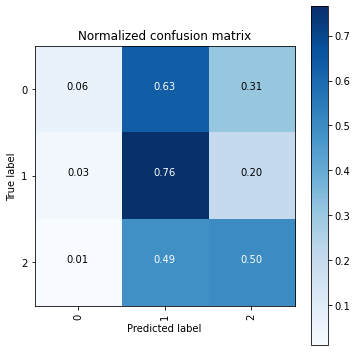

In [ ]:
cnf_matrix = confusion_matrix(y_test, predicted_gb)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## XGboost

In [ ]:
from xgboost import XGBClassifier


range_T = [50, 100, 200, 500, 1000]




for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =3, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =4, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =5, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =6, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 6 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =7, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 7 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =8, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 8 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

For max_depth = 2 and t = 50 The accuracy is : 0.5040485829959515
For max_depth = 2 and t = 100 The accuracy is : 0.5080971659919028
For max_depth = 2 and t = 200 The accuracy is : 0.4939271255060729
For max_depth = 2 and t = 500 The accuracy is : 0.47368421052631576
For max_depth = 2 and t = 1000 The accuracy is : 0.4777327935222672
For max_depth = 3 and t = 50 The accuracy is : 0.4979757085020243
For max_depth = 3 and t = 100 The accuracy is : 0.5
For max_depth = 3 and t = 200 The accuracy is : 0.48582995951417
For max_depth = 3 and t = 500 The accuracy is : 0.46963562753036436
For max_depth = 3 and t = 1000 The accuracy is : 0.46153846153846156
For max_depth = 4 and t = 50 The accuracy is : 0.48380566801619435
For max_depth = 4 and t = 100 The accuracy is : 0.5080971659919028
For max_depth = 4 and t = 200 The accuracy is : 0.48785425101214575
For max_depth = 4 and t = 500 The accuracy is : 0.4777327935222672
For max_depth = 4 and t = 1000 The accuracy is : 0.4777327935222672
For max

In [ ]:
xgb = XGBClassifier(max_depth = 8, n_estimators = 50)

xgb.fit(X_train, y_train)

predicted_xgb = xgb.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_xgb))


Clasification report
              precision    recall  f1-score   support

           0       0.24      0.11      0.15       111
           1       0.56      0.73      0.63       217
           2       0.51      0.49      0.50       166

    accuracy                           0.51       494
   macro avg       0.44      0.44      0.43       494
weighted avg       0.47      0.51      0.48       494



Normalized confusion matrix


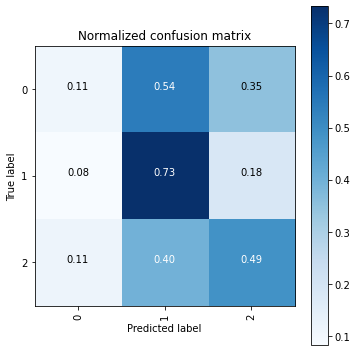

In [ ]:
cnf_matrix = confusion_matrix(y_test, predicted_xgb)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## MLP

In [84]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Embedding, Concatenate
from tensorflow.keras.models import Model

mlp = Sequential([
    Input(shape = X_train[0].shape[0]),
    Dense(64, activation = "relu"),
    Dense(32, activation= "relu"),
    Dense(3, activation = "softmax")
])

mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 6339 (24.76 KB)
Trainable params: 6339 (24.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=3) # Conjunto de validación = 0.8*0.25 = 0.2, este valor es estándar para validación

y_train2 = keras.utils.to_categorical(y_train2, 3)
y_val = keras.utils.to_categorical(y_val, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [86]:
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Ajusta la función de pérdida según el tipo de problema categorical es para multi clases
mlp.fit(X_train2, y_train2, batch_size=1000, epochs=400, validation_data=(X_val, y_val))

Epoch 1/400


3/3 [==============================] - 1s 70ms/step - loss: 1.2655 - accuracy: 0.2745 - val_loss: 1.1648 - val_accuracy: 0.3118
Epoch 2/400
3/3 [==============================] - 0s 13ms/step - loss: 1.1595 - accuracy: 0.3227 - val_loss: 1.1109 - val_accuracy: 0.3933
Epoch 3/400
3/3 [==============================] - 0s 13ms/step - loss: 1.0979 - accuracy: 0.3892 - val_loss: 1.0825 - val_accuracy: 0.4326
Epoch 4/400
3/3 [==============================] - 0s 13ms/step - loss: 1.0616 - accuracy: 0.4422 - val_loss: 1.0690 - val_accuracy: 0.4480
Epoch 5/400
3/3 [==============================] - 0s 13ms/step - loss: 1.0416 - accuracy: 0.4632 - val_loss: 1.0628 - val_accuracy: 0.4396
Epoch 6/400
3/3 [==============================] - 0s 13ms/step - loss: 1.0277 - accuracy: 0.4852 - val_loss: 1.0585 - val_accuracy: 0.4621
Epoch 7/400
3/3 [==============================] - 0s 13ms/step - loss: 1.0187 - accuracy: 0.5002 - val_loss: 1.0530 - val_accuracy: 0.4663
Epoch 8/400
3/3 [===============

In [87]:
predicted_mlp = mlp.predict(X_test)
predicted_mlp = [np.argmax(x) for x in predicted_mlp]
y_test = [np.argmax(x) for x in y_test]

39/39 [==============================] - 0s 684us/step


In [88]:
print("Clasification report")
print(classification_report(y_test, predicted_mlp))

Clasification report
              precision    recall  f1-score   support

           0       0.25      0.20      0.22       292
           1       0.54      0.56      0.55       531
           2       0.41      0.45      0.43       398

    accuracy                           0.44      1221
   macro avg       0.40      0.40      0.40      1221
weighted avg       0.43      0.44      0.43      1221



Normalized confusion matrix


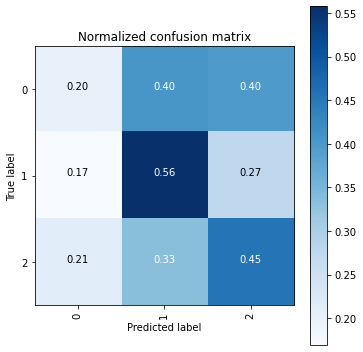

In [89]:
cnf_matrix = confusion_matrix(y_test, predicted_mlp)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()